# Лабораторная работа №5

In [584]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
import sklearn
import mglearn
import mglearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [585]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_linnerud


linnerud = load_linnerud()
print("Датасет linnerud:")
print(linnerud.DESCR)
print("Признаки (X):")
print(linnerud.data[:5])  
print("Целевая переменная (y):")
print(linnerud.target[:5])



Датасет linnerud:
.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.

Признаки (X):
[[  5. 162.  60.]
 [  2. 110.  60.]
 [ 12. 101. 101.]
 [ 12. 105.  37.]
 [ 13. 155.  58.]]
Целевая переменная (y):
[[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]]


In [586]:
linnerud_df = pd.DataFrame(data=np.c_[linnerud.data, linnerud.target], columns=linnerud.feature_names + ['Chins', 'Situps', 'Jumps'])
print("DataFrame датасета linnerud:")
print(linnerud_df.head())

DataFrame датасета linnerud:
   Chins  Situps  Jumps  Chins  Situps  Jumps
0    5.0   162.0   60.0  191.0    36.0   50.0
1    2.0   110.0   60.0  189.0    37.0   52.0
2   12.0   101.0  101.0  193.0    38.0   58.0
3   12.0   105.0   37.0  162.0    35.0   62.0
4   13.0   155.0   58.0  189.0    35.0   46.0


In [587]:
linnerud = load_linnerud()
X = linnerud.data
y = linnerud.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
knn_regressor = KNeighborsRegressor(n_neighbors=9)
knn_regressor.fit(X_train, y_train)



KNeighborsRegressor(n_neighbors=9)

In [588]:
y_pred = knn_regressor.predict(X_test)
print("test {:.2f}".format(knn_regressor.score(X_train, y_train)))
print("test {:.2f}".format(knn_regressor.score(X_test, y_test)))

test 0.07
test -0.09


In [589]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [590]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_linnerud

# Загрузка данных
diabetes = load_diabetes()
X = linnerud.data
y = linnerud.target

# Создание датафрейма
df = pd.DataFrame(data=np.c_[linnerud.data, linnerud.target], columns=linnerud.feature_names + ['Chins', 'Situps', 'Jumps'])
# Задайте некоторые отсутствующие значения в данных (просто для примера)
# В реальных данных отсутствующие значения могут быть обозначены, например, как NaN
df.iloc[5, 2] = np.nan
df.iloc[10, 3] = np.nan

# Замена отсутствующих значений средними значениями по столбцу
df.fillna(df.mean(), inplace=True)

In [591]:
linnerud = load_linnerud()
X = linnerud.data
y = linnerud.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)
knn_regressor = KNeighborsRegressor(n_neighbors=9)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [592]:
from sklearn.metrics import r2_score

# Предсказание значений на тестовом наборе данных
y_pred_test = knn_regressor.predict(X_test)

# Предсказание значений на тренировочном наборе данных
y_pred_train = knn_regressor.predict(X_train)

# Оценка качества модели на тестовых данных с использованием R^2
r2_test = r2_score(y_test, y_pred_test)
print("R^2 на тестовом наборе данных: {:.2f}".format(r2_test))

# Оценка качества модели на тренировочных данных с использованием R^2
r2_train = r2_score(y_train, y_pred_train)
print("R^2 на тренировочном наборе данных: {:.2f}".format(r2_train))

R^2 на тестовом наборе данных: -0.18
R^2 на тренировочном наборе данных: 0.13


In [593]:
print(X.shape)  # Проверка размера X
print(y.shape)  # Проверка размера y

(20, 3)
(20, 3)


In [594]:
import numpy as np
from sklearn.model_selection import cross_val_score
linnerud = load_linnerud()
X = linnerud.data
y = linnerud.target[:, 0]  # В данном случае выбираем одну из целевых переменных (Weight)
model = LinearRegression()

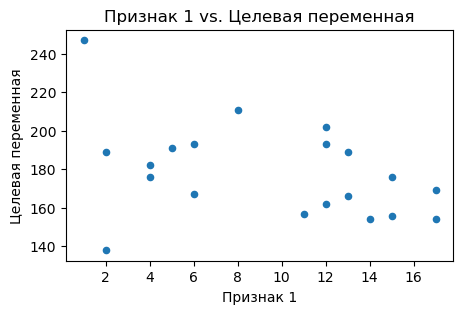

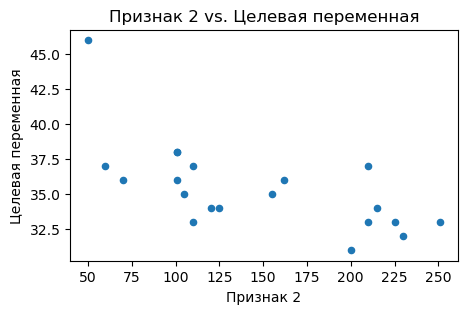

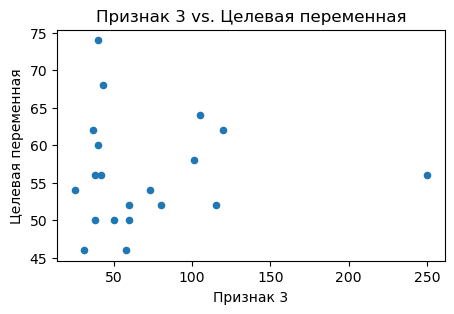

In [595]:
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка данных Linnerud
linnerud = load_linnerud()
X = linnerud.data
y = linnerud.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение графиков для исследования связи между признаками и целевой переменной
for feature_index in range(3):
    plt.figure(figsize=(5, 3))
    plt.scatter(X[:, feature_index],y[:, feature_index], s=20)
    plt.title(f"Признак {feature_index + 1} vs. Целевая переменная")
    plt.xlabel(f"Признак {feature_index + 1}")
    plt.ylabel("Целевая переменная")
    plt.show()


In [596]:
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

In [597]:
print("R^2 на кросс-валидации: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))


R^2 на кросс-валидации: -4.73 (+/- 14.53)


In [598]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()
X = linnerud.data
y = linnerud.target[:, 0]  # В данном случае выбираем одну из целевых переменных (Weight)
model = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
scores = cross_val_score(model, X, y, cv=5, scoring='r2')


In [599]:
print("R^2 на кросс-валидации: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))


R^2 на кросс-валидации: -1.37 (+/- 2.37)


In [600]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_linnerud

# Загрузите данные
linnerud = load_linnerud()
X = linnerud.data
y = linnerud.target[:, 0]  # В данном случае выбираем одну из целевых переменных (Weight)

# Используйте манхэттенскую метрику
model = KNeighborsRegressor(n_neighbors=5, metric='manhattan')

# Выполните кросс-валидацию
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Выведите результаты кросс-валидации
print("R^2 на кросс-валидации: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))


R^2 на кросс-валидации: -1.37 (+/- 2.37)


Диапазоны значений признаков:
Chins: Минимальное значение - 1.0, Максимальное значение - 17.0
Situps: Минимальное значение - 50.0, Максимальное значение - 251.0
Jumps: Минимальное значение - 25.0, Максимальное значение - 250.0


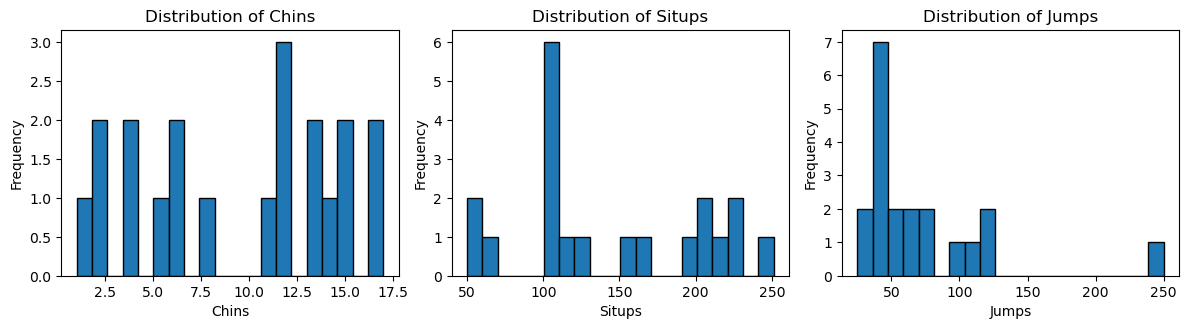

In [601]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_linnerud

# Загрузим данные Linnerud
linnerud = load_linnerud()

# Создадим DataFrame для удобства анализа
df = pd.DataFrame(data=linnerud.data, columns=linnerud.feature_names)

# Рассчитаем статистику для каждого признака
statistics = df.describe()

# Выведем диапазоны значений признаков
print("Диапазоны значений признаков:")
for feature in linnerud.feature_names:
    min_value = statistics[feature]['min']
    max_value = statistics[feature]['max']
    print(f"{feature}: Минимальное значение - {min_value}, Максимальное значение - {max_value}")

# Посмотрим на распределение данных
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, feature in enumerate(linnerud.feature_names):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[feature], bins=20, edgecolor='k')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [602]:
from sklearn.preprocessing import StandardScaler

# Создание экземпляра StandardScaler
scaler = StandardScaler()

# Применение стандартизации к данным
X_scaled = scaler.fit_transform(df)


from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Разбиваем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, linnerud.target, test_size=0.2, random_state=1)

# Создаем модель KNN
knn_regressor = KNeighborsRegressor(n_neighbors=9)  # Установите желаемое количество соседей

# Обучаем модель на тренировочных данных
knn_regressor.fit(X_train, y_train)

# Оцениваем производительность модели на тестовых данных
r2_score = knn_regressor.score(X_test, y_test)
print(f"Коэффициент детерминации (R^2) на тестовом наборе: {r2_score:.2f}")


Коэффициент детерминации (R^2) на тестовом наборе: 0.40


In [603]:
# Импортировать необходимые библиотеки
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Загрузите данные
linnerud = load_linnerud()
X = linnerud.data
y = linnerud.target[:, 0]  
# Создать модель линейной регрессии
model = LinearRegression()

# Разделить данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучить модель на обучающем наборе
model.fit(X_train, y_train)

# Предсказать значения на тестовом наборе
y_pred = model.predict(X_test)

# Оценить производительность модели
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратичная ошибка (MSE):", mse)

# Посмотреть коэффициенты регрессии
print("Коэффициенты регрессии (b1, b2, ...):", model.coef_)

# Посмотреть свободный член (intercept)
print("Свободный член (b0):", model.intercept_)


Среднеквадратичная ошибка (MSE): 630.7757097870915
Коэффициенты регрессии (b1, b2, ...): [ 0.45032944 -0.31848005  0.09103322]
Свободный член (b0): 210.1795737802265


           Chins      Situps      Jumps
count  20.000000   20.000000   20.00000
mean    9.450000  145.550000   70.30000
std     5.286278   62.566575   51.27747
min     1.000000   50.000000   25.00000
25%     4.750000  101.000000   39.50000
50%    11.500000  122.500000   54.00000
75%    13.250000  210.000000   85.25000
max    17.000000  251.000000  250.00000


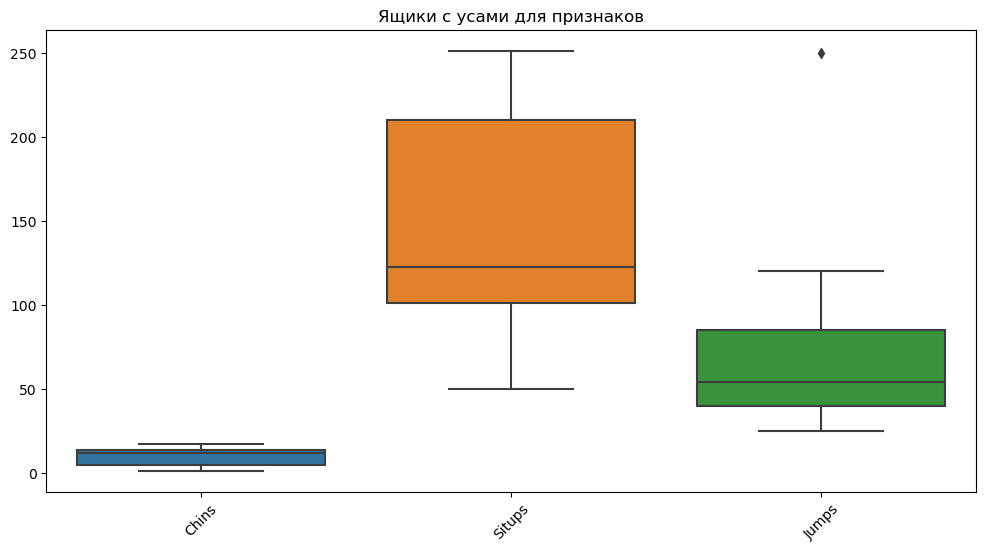

In [604]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_linnerud
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Загрузите набор данных "linnerud"
data = load_linnerud(as_frame=True)
X = data.data  # Признаки
y = data.target  # Целевая переменная

# Анализ данных
# 1. Посмотрим на описательную статистику данных
data_description = X.describe()
print(data_description)

# 2. Визуализируем данные для выявления выбросов
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.title("Ящики с усами для признаков")
plt.show()

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [657]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Создать модель линейной регрессии
model = LinearRegression()

# Разделить данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Обучить модель на обучающем наборе
model.fit(X_train, y_train)

# Предсказать значения на тестовом наборе
y_pred = model.predict(X_test)

# Оценить производительность модели
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратичная ошибка (MSE):", mse)

# Посмотреть коэффициенты регрессии
print("Коэффициенты регрессии (b1, b2, ...):", model.coef_)

# Посмотреть свободный член (intercept)
print("Свободный член (b0):", model.intercept_)


Среднеквадратичная ошибка (MSE): 239.15367187682725
Коэффициенты регрессии (b1, b2, ...): [[  2.32028939 -19.42166328   4.54975784]
 [ -0.40296125  -2.95831207   1.39807728]
 [ -2.48742141   5.68447328  -2.50327424]]
Свободный член (b0): [174.48005053  35.08741643  57.49509643]


In [606]:
# Создайте DataFrame на основе данных linnerud
data = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)

# Определите верхний и нижний пороги для каждого признака (например, используя межквартильный размах)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруйте данные, чтобы удалить выбросы
data_filtered = data[(data >= lower_bound) & (data <= upper_bound)]

# Теперь data_filtered содержит данные без выбросов

# Далее, вы можете использовать data_filtered для обучения модели


In [607]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Создать экземпляр SimpleImputer для замены отсутствующих значений средними
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_filtered)

# Разделите данные на признаки (X) и целевую переменную (y)
X = data_imputed
y = linnerud.target

# Разделите данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создать модель линейной регрессии
model = LinearRegression()

# Обучить модель на обучающем наборе
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценить производительность модели
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратичная ошибка (MSE):", mse)



Среднеквадратичная ошибка (MSE): 165.58147977408206


In [608]:
import pandas as pd
import numpy as np

# Создайте DataFrame из данных linnerud
linnerud_df = pd.DataFrame(linnerud, columns=['Chins', 'Situps', 'Jumps'])

# Удалите строки с отсутствующими значениями
linnerud_clean = linnerud_df.dropna()

In [609]:
import numpy as np
from sklearn.impute import SimpleImputer

# Преобразуйте данные linnerud в массив NumPy
linnerud_array = linnerud.data

# Создайте экземпляр SimpleImputer с желаемой стратегией (например, медиана)
imputer = SimpleImputer(strategy='median')

# Примените импутацию к данным
linnerud_imputed = imputer.fit_transform(linnerud_array)

In [610]:
from sklearn.impute import SimpleImputer

# Создаем объект Imputer
imputer = SimpleImputer(strategy='median')

# Применяем Imputer к обучающему и тестовому наборам данных
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [611]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Загрузка данных
linnerud = datasets.load_linnerud()
X = linnerud.data  # Признаки
y = (linnerud.target[:, 0] > 200).astype(int)  # Бинарная классификация на основе признака "Chins"

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение модели LinearSVC
svc = LinearSVC(dual=False)
svc.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = svc.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели LinearSVC: {:.2f}".format(accuracy))


Точность модели LinearSVC: 0.75


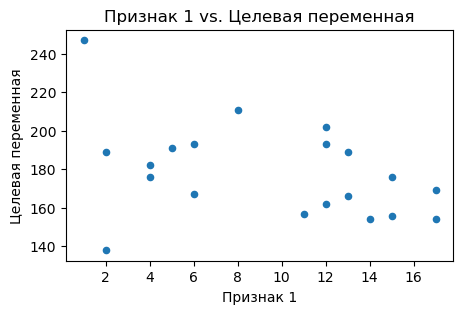

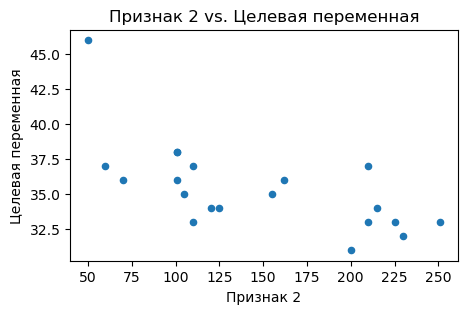

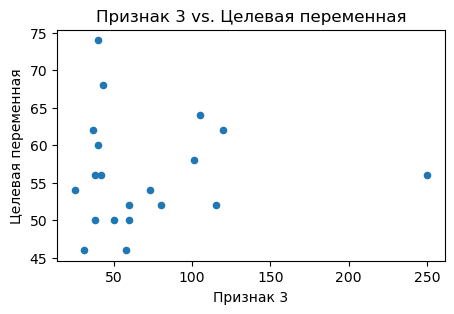

In [612]:
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка данных Linnerud
linnerud = load_linnerud()
X = linnerud.data
y = linnerud.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение графиков для исследования связи между признаками и целевой переменной
for feature_index in range(3):
    plt.figure(figsize=(5, 3))
    plt.scatter(X[:, feature_index],y[:, feature_index], s=20)
    plt.title(f"Признак {feature_index + 1} vs. Целевая переменная")
    plt.xlabel(f"Признак {feature_index + 1}")
    plt.ylabel("Целевая переменная")
    plt.show()


test -0.54


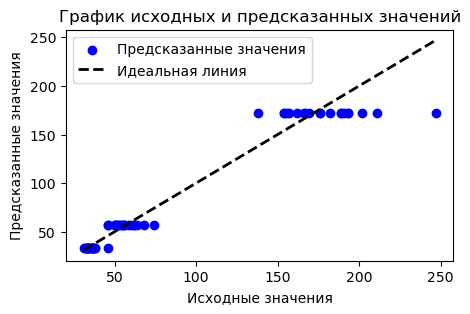

In [613]:
print("test {:.2f}".format(knn_regressor.score(X_test, y_test)))
y_pred = knn_regressor.predict(X)
y_true = y_test[:, i]
plt.figure(figsize=(5, 3))
plt.scatter(y, y_pred, c='b', label='Предсказанные значения')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Идеальная линия')
plt.xlabel('Исходные значения')
plt.ylabel('Предсказанные значения')
plt.title('График исходных и предсказанных значений')
plt.legend()
plt.show()

In [614]:
# Разные значения количества соседей
n_neighbors = [1, 3, 5, 9, 11]

train_scores = []
test_scores = []

for k in n_neighbors:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)

    y_train_pred = knn_regressor.predict(X_train)
    y_test_pred = knn_regressor.predict(X_test)

    train_scores.append(r2_score(y_train, y_train_pred))
    test_scores.append(r2_score(y_test, y_test_pred))

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors, train_scores, label='Обучающий набор')
plt.plot(n_neighbors, test_scores, label='Тестовый набор')
plt.xlabel('Количество соседей')
plt.ylabel('R^2')
plt.title('Сравнение правильности на обучающем и тестовом наборах')
plt.legend()
plt.show()

TypeError: 'numpy.float64' object is not callable

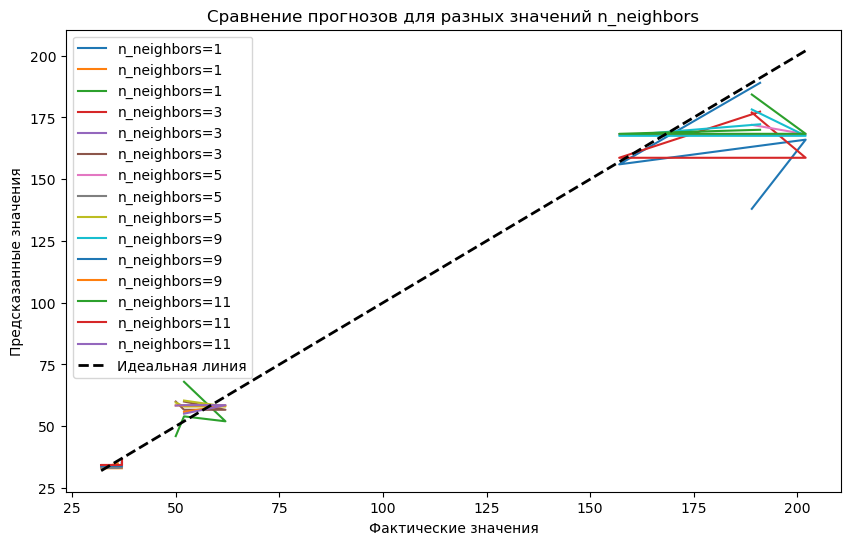

In [615]:
predictions = []

for k in n_neighbors:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    predictions.append(y_pred)

# Построение графика
plt.figure(figsize=(10, 6))
for i, k in enumerate(n_neighbors):
    plt.plot(y_test, predictions[i], label=f'n_neighbors={k}')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Идеальная линия')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение прогнозов для разных значений n_neighbors')
plt.legend()
plt.show()

In [616]:
# Модель LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_linnerud_pred_linear = linear_regressor.predict(X_test)

# Модель Ridge
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)
y_linnerud_pred_ridge = ridge_regressor.predict(X_test)

# Модель Lasso
lasso_regressor = Lasso(alpha=1.0)
lasso_regressor.fit(X_train, y_train)
y_linnerud_pred_lasso = lasso_regressor.predict(X_test)

In [617]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, linnerud.target, test_size=0.2, random_state=1)
knn_regressor = KNeighborsRegressor(n_neighbors=9)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [618]:
from sklearn.metrics import r2_score

# Предсказание значений на тестовом наборе данных
y_pred_test = knn_regressor.predict(X_test)

# Предсказание значений на тренировочном наборе данных
y_pred_train = knn_regressor.predict(X_train)

# Оценка качества модели на тестовых данных с использованием R^2
r2_test = r2_score(y_test, y_pred_test)
print("R^2 на тестовом наборе данных: {:.2f}".format(r2_test))

# Оценка качества модели на тренировочных данных с использованием R^2
r2_train = r2_score(y_train, y_pred_train)
print("R^2 на тренировочном наборе данных: {:.2f}".format(r2_train))

R^2 на тестовом наборе данных: 0.40
R^2 на тренировочном наборе данных: 0.10


In [659]:
print("test {:.2f}".format(knn_regressor.score(X_test, y_test)))

test 0.17


In [661]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучите модель на масштабированных данных
linear_reg.fit(X_train_scaled, y_train)

# Оцените модель на тестовых данных
linear_reg_score = linear_reg.score(X_test_scaled, y_test)
print("Оценка R^2 для Linear Regression на тестовых данных после масштабирования:", linear_reg_score)


Оценка R^2 для Linear Regression на тестовых данных после масштабирования: -1.3504115542086341


# Результаты:

регрессия ближайших соседей

R^2 на тестовом наборе данных: 0.40

R^2 на тренировочном наборе данных: 0.10

Линейная регрессия  - Оценка на обучающих данных: 0.33

Линейная регрессия  - Оценка на тестовых данных: -0.30

Лассо регрессия - Оценка на обучающих данных:0.33

Лассо регрессия - Оценка на тестовых данных: -0.30

количество использованных признаков: 9

Гребневая регрессия - Оценка на обучающих данных: 0.33

Гребневая регрессия - Оценка на тестовых данных: -0.13


модели LinearSVC

Точность модели LinearSVC: 0.75

Датасет Linnerrud представляет собой многомерный регрессионный набор данных, который включает в себя три физиологических (целевых) переменных и три переменных, связанных с физическими упражнениями, собранных от двадцати средних мужчин в фитнес-клубе:

Физиологические переменные:

Вес (Weight)
Обхват талии (Waist)
Пульс (Pulse)
Переменные, связанные с упражнениями:

Чины (Chins) - количество подтягиваний
Подъемы туловища (Situps) - количество подъемов туловища
Прыжки (Jumps) - количество прыжков
Датасет состоит из 20 наблюдений без отсутствующих значений.

из регрессии ближайших соседей видно что модель скорее всего переобучается, довольно большая разница между тестовым и тренировачным наборами.

Линейная регрессия, лассо и гребневая регрессия имеют более низкие R^2 на тестовом наборе данных, и даже отрицательные значения R^2 на тестовых данных, что указывает на то, что эти модели не хорошо объясняют изменчивость в данных. Скорее всего в этой работе модели могут быть недоученными.

Модель LinearSVC (линейная машина опорных векторов) имеет точность равную 0.75, что может указывать на хорошую способность модели классифицировать данные. 